In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
bbq_summer = pd.read_csv("bbq_summer.csv")
vendor_costs = pd.read_csv("vendor_costs_spring_2022 - Sheet1.csv")

## Conjoint Analysis & Memo Section (20 points)

***
### Summary
**`Summer Grill Menu`**
- One starter
- Two main dishes (one each from two groups of choices)
- One side
- One dessert
- All options come with unlimited soda and dipping sauce
- Hope local beer vendors sell beverages that will go well with the food choices

**`Ratings`**
- Determined by more than 2000 total survey responses per bundle
- Consumers gave these ratings in a cost-netural way (simply rate the bundles based on taste/preferences)

**`Pricing`**
- vendor_costs.csv dataset contains information about the per-serving cost associated with each option that has been presented to Lobster Land
- Lobster Land management has decided that it will charge a flat \\$15 fee for all visitors who enter the Barbeque Tent at the Portland Calling festival

**`Executive Summary Memo`**
- One-page to Lobster Land
- Clearly state the recommendation for the barbeque options that Lobster Land should go with
***

In [2]:
bbq_summer

,bundleID,starter,maindishI,maindishII,side,dessert,avg_rating
0,1,Fried Chicken Tenders,BBQ Brisket,Sausage,Mac and Cheese,Blondie Brownie,6.040
1,2,Fried Chicken Tenders,BBQ Brisket,Sausage,Mac and Cheese,Apple Pie a la Mode,9.290
2,3,Fried Chicken Tenders,BBQ Brisket,Sausage,Potato Salad,Blondie Brownie,6.200
3,4,Fried Chicken Tenders,BBQ Brisket,Sausage,Potato Salad,Apple Pie a la Mode,8.840
4,5,Fried Chicken Tenders,BBQ Brisket,Sausage,French Fry Platter,Blondie Brownie,8.240
...,...,...,...,...,...,...,...
379,380,Jumbo Shrimp Cocktail,Buffalo Chicken Macaroni Stacker,Steak Sampler,Mac and Cheese,Apple Pie a la Mode,4.738
380,381,Jumbo Shrimp Cocktail,Buffalo Chicken Macaroni Stacker,Steak Sampler,Potato Salad,Blondie Brownie,4.768
381,382,Jumbo Shrimp Cocktail,Buffalo Chicken Macaroni Stacker,Steak Sampler,Potato Salad,Apple Pie a la Mode,6.248
382,383,Jumbo Shrimp Cocktail,Buffalo Chicken Macaroni Stacker,Steak Sampler,French Fry Platter,Blondie Brownie,7.138


In [3]:
bbq_summer.isnull().values.any()

False

In [4]:
# removing the bundleID variable
bbq_summer.drop('bundleID', axis=1, inplace=True)

In [5]:
bbq_summer.columns

Index(['starter', 'maindishI', 'maindishII', 'side', 'dessert', 'avg_rating'], dtype='object')

In [6]:
bbq_dummies = pd.get_dummies(bbq_summer, drop_first=True, columns=['starter', 'maindishI', 'maindishII', 'side', 'dessert'])
bbq_dummies

,avg_rating,starter_Fried Chicken Tenders,starter_Jumbo Shrimp Cocktail,starter_Sticky Chicken Tenders,maindishI_BBQ Chicken,maindishI_Buffalo Chicken Macaroni Stacker,maindishI_Pulled Pork,maindishII_Lobster Roll,maindishII_Sausage,maindishII_Steak Sampler,side_Mac and Cheese,side_Potato Salad,dessert_Blondie Brownie
0,6.040,1,0,0,0,0,0,0,1,0,1,0,1
1,9.290,1,0,0,0,0,0,0,1,0,1,0,0
2,6.200,1,0,0,0,0,0,0,1,0,0,1,1
3,8.840,1,0,0,0,0,0,0,1,0,0,1,0
4,8.240,1,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,4.738,0,1,0,0,1,0,0,0,1,1,0,0
380,4.768,0,1,0,0,1,0,0,0,1,0,1,1
381,6.248,0,1,0,0,1,0,0,0,1,0,1,0
382,7.138,0,1,0,0,1,0,0,0,1,0,0,1


In [7]:
bbq_dummies.columns

Index(['avg_rating', 'starter_Fried Chicken Tenders',
       'starter_Jumbo Shrimp Cocktail', 'starter_Sticky Chicken Tenders',
       'maindishI_BBQ Chicken', 'maindishI_Buffalo Chicken Macaroni Stacker',
       'maindishI_Pulled Pork', 'maindishII_Lobster Roll',
       'maindishII_Sausage', 'maindishII_Steak Sampler', 'side_Mac and Cheese',
       'side_Potato Salad', 'dessert_Blondie Brownie'],
      dtype='object')

In [8]:
X = bbq_dummies[['starter_Fried Chicken Tenders',
       'starter_Jumbo Shrimp Cocktail', 'starter_Sticky Chicken Tenders',
       'maindishI_BBQ Chicken', 'maindishI_Buffalo Chicken Macaroni Stacker',
       'maindishI_Pulled Pork', 'maindishII_Lobster Roll',
       'maindishII_Sausage', 'maindishII_Steak Sampler', 'side_Mac and Cheese',
       'side_Potato Salad', 'dessert_Blondie Brownie']]
y = bbq_dummies['avg_rating']

In [9]:
bbq_regressor = LinearRegression()
bbq_regressor.fit(X, y)

LinearRegression()

In [10]:
bbq_regressor.intercept_

7.1403874999999895

In [11]:
# displaying the coefficient values of the model inputs.
bbq_coef = pd.DataFrame(bbq_regressor.coef_, X.columns, columns=['Coefficient'])
bbq_coef

,Coefficient
starter_Fried Chicken Tenders,0.133571
starter_Jumbo Shrimp Cocktail,-0.630587
starter_Sticky Chicken Tenders,0.339275
maindishI_BBQ Chicken,-0.209208
maindishI_Buffalo Chicken Macaroni Stacker,0.536821
maindishI_Pulled Pork,0.529313
maindishII_Lobster Roll,1.048096
maindishII_Sausage,0.331992
maindishII_Steak Sampler,-0.500462
side_Mac and Cheese,0.575125


**`Most Popular/Least Popular Options`**
- **Starter**: Most Popular-Sticky Chicken Tenders, Least Popular-Jumbo Shrimp Cocktail
- **Main_I**: Most Popular-Buffalo Chicken Macaroni Stacker (VERY CLOSELY followed by Pulled Pork), Least Popular-BBQ Chicken
- **Main_II**: Most Popular-Lobster Roll (VERY STRONG prefence since it is a signature menu that matches the theme of the Lobster Land. Including this in a bundle will make the event more memorable), Least Popular-Steak Sampler(people might think that including this menu will make the whole bundle featureless or too common)
- **Side**: Most popular-Mac and Cheese (not only children but also adults like it because of its taste), Least Popular-Potato Salad (it can go bad easily, and a refrigerator is needed to keep it fresh which might result in additional costs)
- **Dessert**: Most popular-Apple Pie (served with ice cream, good to cool body temperature down in the summer), Least Popular-Blondie Brownie (chocolate chips added to the blondie might make people thirsty because of the sugar content which makes people drink more water, and that will lead them to go to the restroom more often during the festival)

***

**Bundle Pricing**: it's used by companies to add value for customers at a lower cost, hopefully increase the number of sales and increase loyalty to the brands. <br>

**`Most Popular Options as a Bundle`**
- **Starter**: Sticky Chicken Tenders
- **Main_I**: Buffalo Chicken Macaroni Stacker
- **Main_II**: Lobster Roll - VERY STRONG
- **Side**: Mac and Cheese
- **Dessert**: Apple Pie a la Mode

However, <br>
The total bundle cost and the average rating need to be considered for the final recommendation.

In [12]:
# 'Beef Short Ribs' under 'Item' variable in 'vendor_costs' dataset was replaced as 'Beef Short Rib' (without an s)
# to match with the 'bbq_summer' dataset
vendor_costs.replace(to_replace='Beef Short Ribs', value='Beef Short Rib', inplace=True)
vendor_costs

,Item,Item Category,Cost Per Serving (Dollars)
0,Fried Chicken Tenders,Starters,3.40
1,Bacon Fries,Starters,3.10
2,Sticky Chicken Tenders,Starters,2.90
3,Jumbo Shrimp Cocktail,Starters,4.60
4,BBQ Brisket,Main Dish I,6.00
5,Pulled Pork,Main Dish I,5.70
6,BBQ Chicken,Main Dish I,5.30
7,Buffalo Chicken Macaroni Stacker,Main Dish I,6.10
8,Sausage,Main Dish II,4.70
9,Lobster Roll,Main Dish II,5.20


In [13]:
# adding total_cost column based on 'Cost Per Serving (Dollars)' variable in vendor_costs dataset
bbq_summer2 = bbq_summer.copy()

prices_lookup = dict(zip(vendor_costs['Item'], vendor_costs['Cost Per Serving (Dollars)']))

for index, row in bbq_summer2.iterrows():
    row_menus = [prices_lookup[dish] for dish in row[0:5]]
    bbq_summer2.loc[index,'total_cost'] = round(sum(row_menus), 2)
    
# bbq_summer2

In [14]:
# showing the price range of all the bundles
bbq_summer2.sort_values(by='total_cost', ascending=True)

,starter,maindishI,maindishII,side,dessert,avg_rating,total_cost
244,Sticky Chicken Tenders,BBQ Chicken,Sausage,French Fry Platter,Blondie Brownie,7.540,13.95
262,Sticky Chicken Tenders,BBQ Chicken,Steak Sampler,French Fry Platter,Blondie Brownie,6.018,13.95
245,Sticky Chicken Tenders,BBQ Chicken,Sausage,French Fry Platter,Apple Pie a la Mode,7.580,14.15
263,Sticky Chicken Tenders,BBQ Chicken,Steak Sampler,French Fry Platter,Apple Pie a la Mode,8.678,14.15
148,Bacon Fries,BBQ Chicken,Sausage,French Fry Platter,Blondie Brownie,8.240,14.15
...,...,...,...,...,...,...,...
372,Jumbo Shrimp Cocktail,Buffalo Chicken Macaroni Stacker,Beef Short Rib,Mac and Cheese,Blondie Brownie,8.830,18.05
303,Jumbo Shrimp Cocktail,BBQ Brisket,Beef Short Rib,Potato Salad,Apple Pie a la Mode,4.210,18.05
375,Jumbo Shrimp Cocktail,Buffalo Chicken Macaroni Stacker,Beef Short Rib,Potato Salad,Apple Pie a la Mode,9.630,18.15
301,Jumbo Shrimp Cocktail,BBQ Brisket,Beef Short Rib,Mac and Cheese,Apple Pie a la Mode,8.450,18.15


***The cost range of the bundle is from \\$13.95 to \\$18.25.***

In [15]:
# filterting the most popular option from each menu to see the ave_rating and total_cost
filter_starter = bbq_summer2['starter'] == 'Sticky Chicken Tenders' # with/without starter filter this gives the same result
filter_mainI = bbq_summer2['maindishI'] == 'Buffalo Chicken Macaroni Stacker'
filter_mainII = bbq_summer2['maindishII'] == 'Lobster Roll'
filter_side = bbq_summer2['side'] == 'Mac and Cheese'
filter_dessert = bbq_summer2['dessert'] == 'Apple Pie a la Mode'
bbq_summer2[filter_starter & filter_mainI & filter_mainII & filter_side
            & filter_dessert].sort_values(by='total_cost', ascending=False)

,starter,maindishI,maindishII,side,dessert,avg_rating,total_cost
271,Sticky Chicken Tenders,Buffalo Chicken Macaroni Stacker,Lobster Roll,Mac and Cheese,Apple Pie a la Mode,7.66,15.75


***It turned out that the best option from each menu as a bundle has a 7.66 rating, which is considered low (below 9.00), and also the total cost exceeds a visitor flat fee of \\$15. It might be becuase both Main Dish I and Side are Macaroni. People would like to have a diversed combination as a bundle.***

In [16]:
# filtering the menu options that NEED to be included as well as the rating and the cost
filter_15 = bbq_summer2['total_cost'] <= 15.35                     # a bit above $15 to see any negotiable bundles
filter_shrimp = bbq_summer2['starter'] != 'Jumbo Shrimp Cocktail' # with/without starter (shrimp) filter gives the same result
filter_lobster = bbq_summer2['maindishII'] == 'Lobster Roll'
filter_apple = bbq_summer2['dessert'] == 'Apple Pie a la Mode'
filter_rating = bbq_summer2['avg_rating'] >= 9

possible_options = bbq_summer2[filter_15 & filter_shrimp & filter_lobster
                               & filter_apple & filter_rating].sort_values(by='total_cost', ascending=False)
possible_options

,starter,maindishI,maindishII,side,dessert,avg_rating,total_cost
223,Sticky Chicken Tenders,Pulled Pork,Lobster Roll,Mac and Cheese,Apple Pie a la Mode,9.9400,15.35
131,Bacon Fries,Pulled Pork,Lobster Roll,French Fry Platter,Apple Pie a la Mode,9.4500,15.25
151,Bacon Fries,BBQ Chicken,Lobster Roll,Mac and Cheese,Apple Pie a la Mode,9.3196,15.15
155,Bacon Fries,BBQ Chicken,Lobster Roll,French Fry Platter,Apple Pie a la Mode,9.2000,14.85
251,Sticky Chicken Tenders,BBQ Chicken,Lobster Roll,French Fry Platter,Apple Pie a la Mode,9.2808,14.65


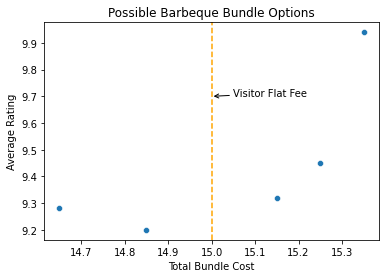

In [17]:
sns.scatterplot(data=possible_options, x="total_cost", y="avg_rating" );
plt.title('Possible Barbeque Bundle Options');
plt.xlabel('Total Bundle Cost');
plt.ylabel('Average Rating');
plt.axvline(x=15.0, color='orange', linestyle='--');
plt.annotate('Visitor Flat Fee', xy=(15,9.7), xytext=(15.05,9.7), arrowprops=dict(arrowstyle='->'));
# plt.savefig("bbq_bundle_options.png") # save as png

Items with low marginal costs tend to work well with a bundling strategy. <br>
(Marginal cost = cost to the seller for selling an incremental item) <br>
Thus, Lobster Land should go with:

**`Final Recommendation`** <br>

**Row 251 (avg_rating: 9.2808, total_cost: \\$14.65)**
- **Starter**: Sticky Chicken Tenders
- **Main_I**: BBQ Chicken
- **Main_II**: Lobster Roll
- **Side**: French Fry Platter
- **Dessert**: Apple Pie a la Mode
The raiting is considered high (above 9.00) and the total cost is lower than \\$15. <br>

Lobster Land could generate profit with this bundle, and there could be some room for the costs of unlimited soda and dipping sauce even though they do not cost that much.

*** 

The option below is alternative in case Lobster Land would like to negotiate with the vendor to reduece the total cost. <br> 

**`Alternative for Negotiation`** <br>

**Row 131 (avg_rating: 9.9400, total_cost: \\$15.35)**
- **Starter**: Sticky Chicken Tenders
- **Main_I**: Pulled Pork
- **Main_II**: Lobster Roll
- **Side**: Mac and Cheese
- **Dessert**: Apple Pie a la Mode

Each menu from this bundle is the most popular option except Pulled Pork, which is the second popular option (the coefficient for Pulled Pork is only 0.007508 lower than Buffalo Chicken Macaroni Stacker, the most popular one) for Main Dish I. The rating is VERY high, thus it is worth it to negotiate with the vendor if high rating is what Lobster Land is looking for.<br>
The reason the vendor charges Lobster Land a specific price for each menu is because those prices generate profit. They might have some room to Lower 40 cents or more (which makes the total cost \\$14.95 and lower), and they might not even experience loss. Lobster Land might make a contract with the vendor to work with them again for next year's music festival or other events for a long term business relationship for a win-win negotiation.

***

**`Explanation on the Other Non-Recommended Options`** <br>

**Row 155 (avg_rating: 9.2000, total_cost: \\$14.85)** <br>
The average rating is lower and the cost is higer than the recommended bundle.

**Row 151 (avg_rating: 9.3196, total_cost: \\$15.15)** <br>
The rating is only 0.04 higher than the recommended bundle. It is not worth it to negotiate.

**Row 131 (avg_rating: 9.4500, total_cost: \\$15.25)** <br>
The rating is 0.17 higher than the recommended bundle, but cost is only 10 cents lower than the best alternative for negotiation.